In [1]:
import osmnx as ox
import folium

In [2]:
# 获取路网数据，并计算从起点到终点的最短路径S
G = ox.graph_from_place('南山区,深圳市,中国', retain_all=False , truncate_by_edge=True, network_type="drive")

In [3]:
import requests
import json
import pprint

In [4]:
def gaode(addr):
        para = {
            'key':'bff294f3fd631c85a1d607798754d4c4',  #高德地图开放平台申请的key
            'address':addr #传入地址参数
        }
        url = 'https://restapi.amap.com/v3/geocode/geo?' #高德地图API接口
        req = requests.get(url,para)
        req = req.json()
        print('-' * 30)
        m = req['geocodes'][0]['location']
        print(addr)
        print(m)
        return m
gaode(addr="南方科技大学")

------------------------------
南方科技大学
113.987724,22.593590


'113.987724,22.593590'

In [5]:
def str_to_tuple(s):
    a, b = s.split(',')
    return tuple([float(b), float(a)])

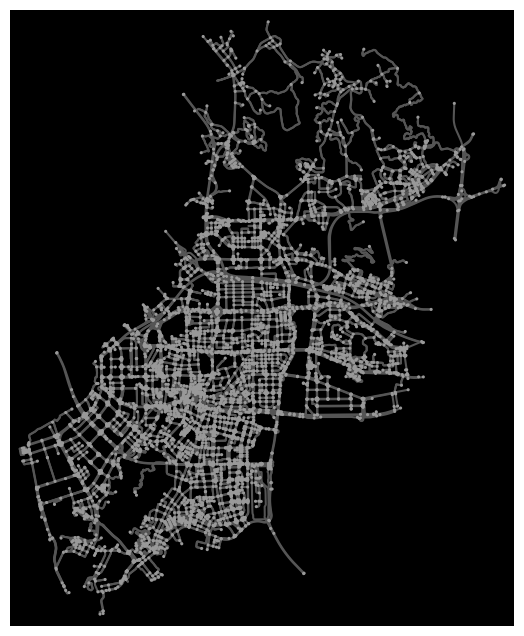

In [6]:
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=5, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

In [7]:
import networkx as nx
import pandas as pd

### Closeness centrality
Closeness centrality衡量一个节点到其他所有节点的平均距离，即一个节点到其他节点的最短路径平均长度的倒数。这个指标越高，说明这个节点在网络中越接近其他节点，可以更快地将信息传递到其他节点，因此在信息传递、交流等方面具有重要作用。

### Betweenness centrality
而betweenness centrality则衡量一个节点在网络中的重要性程度，即在网络中多少条最短路径会经过这个节点。在一个网络中，一个节点的betweenness centrality越高，说明它在连接其他节点之间扮演着更为重要的中介角色，这种节点在网络中往往具有较大的控制力，例如在信息传递、物流运输等领域中。

In [8]:
node_centrality_cc = nx.closeness_centrality(G)

In [9]:
#node_centrality_cc = nx.betweenness_centrality(G)

In [10]:
df = pd.DataFrame(data=pd.Series(node_centrality_cc).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)

In [11]:
df

,cc,colors
279961518,0.000000,"(0.258234, 0.038571, 0.406485, 1.0)"
6222133028,0.000000,"(0.258234, 0.038571, 0.406485, 1.0)"
2457761650,0.000000,"(0.258234, 0.038571, 0.406485, 1.0)"
6001982356,0.000000,"(0.258234, 0.038571, 0.406485, 1.0)"
5865250366,0.000000,"(0.258234, 0.038571, 0.406485, 1.0)"
...,...,...
3810804951,0.036334,"(0.988362, 0.998364, 0.644924, 1.0)"
296024714,0.036488,"(0.988362, 0.998364, 0.644924, 1.0)"
3810814633,0.037041,"(0.988362, 0.998364, 0.644924, 1.0)"
2300712922,0.038476,"(0.988362, 0.998364, 0.644924, 1.0)"


In [12]:
df = df.reindex(G.nodes())

In [13]:
df

,cc,colors
267602001,0.000154,"(0.26481, 0.039647, 0.409345, 1.0)"
267602507,0.026395,"(0.912966, 0.381636, 0.169755, 1.0)"
267602518,0.030294,"(0.948683, 0.910473, 0.395289, 1.0)"
267602574,0.030339,"(0.947594, 0.917399, 0.410665, 1.0)"
276926174,0.025904,"(0.878001, 0.33206, 0.212268, 1.0)"
...,...,...
10673798438,0.026225,"(0.902003, 0.364492, 0.184116, 1.0)"
10734750101,0.030291,"(0.948683, 0.910473, 0.395289, 1.0)"
10751227796,0.024185,"(0.718264, 0.206636, 0.340931, 1.0)"
10779125263,0.016364,"(0.27785, 0.042353, 0.414392, 1.0)"


In [14]:
nodes_gdf = ox.graph_to_gdfs(G, edges=False)
nodes_gdf.head()

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
267602001,22.548977,113.988136,2270,motorway_junction,3,POINT (113.98814 22.54898)
267602507,22.544618,113.905263,NaN,NaN,3,POINT (113.90526 22.54462)
267602518,22.545367,113.904361,NaN,NaN,3,POINT (113.90436 22.54537)
267602574,22.531191,113.913611,NaN,traffic_signals,5,POINT (113.91361 22.53119)
276926174,22.576662,113.914816,NaN,NaN,3,POINT (113.91482 22.57666)


In [15]:
edges_gdf = ox.graph_to_gdfs(G, nodes=False)
edges_gdf.head()

osmid  \
u         v          key                                                      
267602001 1722822969 0                     [160220792, 160220797, 25588751]   
          277838415  0    [687537992, 687537993, 96328137, 1006938312, 2...   
267602507 2401176953 0                                            231787772   
267602518 2457761634 0                                            165265378   
267602574 2420580046 0                                            233713929   

                          oneway   lanes        highway reversed    length  \
u         v          key                                                     
267602001 1722822969 0      True       2  motorway_link    False  1092.237   
          277838415  0      True  [3, 4]       motorway    False  5806.693   
267602507 2401176953 0      True     NaN        primary    False   113.850   
267602518 2457761634 0      True     NaN      secondary    False   110.792   
267602574 2420580046 0      True     NaN      secondary    False    62.720   

                           bridge  \
u         v          key            
267602001 1722822969 0    viaduct   
          277838415  0        yes   
267602507 2401176953 0        yes   
267602518 2457761634 0        NaN   
267602574 2420580046 0        NaN   

                                                                   geometry  \
u         v          key                                                      
267602001 1722822969 0    LINESTRING (113.98814 22.54898, 113.98779 22.5...   
          277838415  0    LINESTRING (113.98814 22.54898, 113.98735 22.5...   
267602507 2401176953 0    LINESTRING (113.90526 22.54462, 113.90507 22.5...   
267602518 2457761634 0    LINESTRING (113.90436 22.54537, 113.90439 22.5...   
267602574 2420580046 0    LINESTRING (113.91361 22.53119, 113.91381 22.5...   

                           ref                                          name  \
u         v          key                                                       
267602001 1722822969 0     NaN                                           NaN   
          277838415  0      G4  [K107+233小桥, 大沙河大桥, K108+651小桥, 京港澳高速, 10#桥]   
267602507 2401176953 0     NaN                                          宝安大道   
267602518 2457761634 0     NaN                                           NaN   
267602574 2420580046 0    Y037                                           南新路   

                         maxspeed tunnel access junction width  
u         v          key                                        
267602001 1722822969 0        NaN    NaN    NaN      NaN   NaN  
          277838415  0        100    NaN    NaN      NaN   NaN  
267602507 2401176953 0        NaN    NaN    NaN      NaN   NaN  
267602518 2457761634 0        NaN    NaN    NaN      NaN   NaN  
267602574 2420580046 0        NaN    NaN    NaN      NaN   NaN

In [16]:
result = pd.merge(df, nodes_gdf, left_index=True, right_index=True, how='inner')

In [17]:
result

,cc,colors,y,x,ref,highway,street_count,geometry
267602001,0.000154,"(0.26481, 0.039647, 0.409345, 1.0)",22.548977,113.988136,2270,motorway_junction,3,POINT (113.98814 22.54898)
267602507,0.026395,"(0.912966, 0.381636, 0.169755, 1.0)",22.544618,113.905263,NaN,NaN,3,POINT (113.90526 22.54462)
267602518,0.030294,"(0.948683, 0.910473, 0.395289, 1.0)",22.545367,113.904361,NaN,NaN,3,POINT (113.90436 22.54537)
267602574,0.030339,"(0.947594, 0.917399, 0.410665, 1.0)",22.531191,113.913611,NaN,traffic_signals,5,POINT (113.91361 22.53119)
276926174,0.025904,"(0.878001, 0.33206, 0.212268, 1.0)",22.576662,113.914816,NaN,NaN,3,POINT (113.91482 22.57666)
...,...,...,...,...,...,...,...,...
10673798438,0.026225,"(0.902003, 0.364492, 0.184116, 1.0)",22.534909,113.937012,NaN,NaN,3,POINT (113.93701 22.53491)
10734750101,0.030291,"(0.948683, 0.910473, 0.395289, 1.0)",22.546012,113.948937,NaN,NaN,3,POINT (113.94894 22.54601)
10751227796,0.024185,"(0.718264, 0.206636, 0.340931, 1.0)",22.584786,113.958063,NaN,NaN,3,POINT (113.95806 22.58479)
10779125263,0.016364,"(0.27785, 0.042353, 0.414392, 1.0)",22.630627,113.989251,NaN,NaN,4,POINT (113.98925 22.63063)


In [18]:
result[result["cc"]<=0.01]

,cc,colors,y,x,ref,highway,street_count,geometry
267602001,0.000154,"(0.26481, 0.039647, 0.409345, 1.0)",22.548977,113.988136,2270,motorway_junction,3,POINT (113.98814 22.54898)
277049917,0.000230,"(0.271347, 0.040922, 0.411976, 1.0)",22.566166,113.931845,NaN,NaN,3,POINT (113.93184 22.56617)
277066022,0.000205,"(0.271347, 0.040922, 0.411976, 1.0)",22.552684,113.906995,NaN,NaN,3,POINT (113.90700 22.55268)
277066023,0.000345,"(0.271347, 0.040922, 0.411976, 1.0)",22.552499,113.907190,NaN,NaN,3,POINT (113.90719 22.55250)
277183586,0.000000,"(0.26481, 0.039647, 0.409345, 1.0)",22.535601,113.992758,NaN,NaN,4,POINT (113.99276 22.53560)
...,...,...,...,...,...,...,...,...
9660672234,0.000000,"(0.26481, 0.039647, 0.409345, 1.0)",22.550971,113.897478,NaN,NaN,3,POINT (113.89748 22.55097)
9722690801,0.000307,"(0.271347, 0.040922, 0.411976, 1.0)",22.593207,114.021149,NaN,NaN,3,POINT (114.02115 22.59321)
9751718238,0.000000,"(0.26481, 0.039647, 0.409345, 1.0)",22.520813,113.931752,NaN,NaN,1,POINT (113.93175 22.52081)
9874791319,0.000000,"(0.26481, 0.039647, 0.409345, 1.0)",22.589861,113.924901,NaN,NaN,1,POINT (113.92490 22.58986)


In [32]:
import geopandas as gpd
process_gdf_nodes = gpd.GeoDataFrame(result[result["cc"]<=0.03])

In [33]:
# 获取被删除节点的 ID 列表
deleted_node_ids = process_gdf_nodes.index.tolist()

# 过滤出未删除的边
edges_gdf = edges_gdf[(edges_gdf.index.get_level_values(0).isin(deleted_node_ids)) | (edges_gdf.index.get_level_values(1).isin(deleted_node_ids))]

# 确保过滤后的边中仍然包含其他必需的列（例如 geometry 列）
edges_gdf = gpd.GeoDataFrame(edges_gdf, crs=edges_gdf.crs)

# 查看过滤后的边
edges_gdf


osmid  \
u           v           key                                                      
267602001   1722822969  0                     [160220792, 160220797, 25588751]   
            277838415   0    [687537992, 687537993, 96328137, 1006938312, 2...   
267602507   2401176953  0                                            231787772   
267602518   2457761634  0                                            165265378   
267602574   2420580046  0                                            233713929   
...                                                                        ...   
10751227796 9045147752  0                              [1050942971, 977527117]   
10779125263 662291929   0                                            270924669   
            10779133894 0                             [1159100147, 1159100148]   
            662292395   0                               [1159100147, 51907167]   
10779133894 10779125263 0                             [1159100147, 1159100148]   

                             oneway   lanes        highway       reversed  \
u           v           key                                                 
267602001   1722822969  0      True       2  motorway_link          False   
            277838415   0      True  [3, 4]       motorway          False   
267602507   2401176953  0      True     NaN        primary          False   
267602518   2457761634  0      True     NaN      secondary          False   
267602574   2420580046  0      True     NaN      secondary          False   
...                             ...     ...            ...            ...   
10751227796 9045147752  0      True  [2, 1]      secondary          False   
10779125263 662291929   0     False     NaN   unclassified          False   
            10779133894 0     False     NaN   unclassified          False   
            662292395   0     False     NaN   unclassified  [False, True]   
10779133894 10779125263 0     False     NaN   unclassified           True   

                               length   bridge  \
u           v           key                      
267602001   1722822969  0    1092.237  viaduct   
            277838415   0    5806.693      yes   
267602507   2401176953  0     113.850      yes   
267602518   2457761634  0     110.792      NaN   
267602574   2420580046  0      62.720      NaN   
...                               ...      ...   
10751227796 9045147752  0     250.460      NaN   
10779125263 662291929   0     643.293      NaN   
            10779133894 0    1762.707      NaN   
            662292395   0    1653.401      NaN   
10779133894 10779125263 0    1762.707      NaN   

                                                                      geometry  \
u           v           key                                                      
267602001   1722822969  0    LINESTRING (113.98814 22.54898, 113.98779 22.5...   
            277838415   0    LINESTRING (113.98814 22.54898, 113.98735 22.5...   
267602507   2401176953  0    LINESTRING (113.90526 22.54462, 113.90507 22.5...   
267602518   2457761634  0    LINESTRING (113.90436 22.54537, 113.90439 22.5...   
267602574   2420580046  0    LINESTRING (113.91361 22.53119, 113.91381 22.5...   
...                                                                        ...   
10751227796 9045147752  0    LINESTRING (113.95806 22.58479, 113.95810 22.5...   
10779125263 662291929   0    LINESTRING (113.98925 22.63063, 113.98911 22.6...   
            10779133894 0    LINESTRING (113.98925 22.63063, 113.98920 22.6...   
            662292395   0    LINESTRING (113.98925 22.63063, 113.98926 22.6...   
10779133894 10779125263 0    LINESTRING (113.97794 22.63660, 113.97793 22.6...   

                              ref  \
u           v           key         
267602001   1722822969  0     NaN   
            277838415   0      G4   
267602507   2401176953  0     NaN   
267602518   2457761634  0     NaN   
267602574   2420580046  0    Y037   
...                        

In [34]:
G2 = ox.graph_from_gdfs(process_gdf_nodes, edges_gdf)

In [35]:
print(type(G2.nodes))
print(type(G2.edges))

<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.OutMultiEdgeView'>


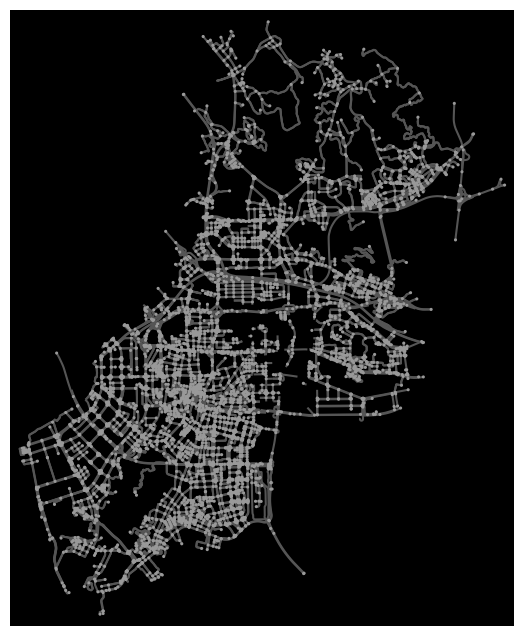

In [36]:
fig, ax = ox.plot_graph(G2, bgcolor='k', node_size=5, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

In [37]:
orig = 5173028123 # sustech
G2.nodes[5173028123]

{'cc': 0.02061501861844008,
 'colors': (0.3415, 0.062325, 0.429425, 1.0),
 'y': 22.5955404,
 'x': 113.9945397,
 'street_count': 4}

In [38]:
dest = 2458770698 # chiwan
G2.nodes[2458770698]

{'cc': 0.024513056114536358,
 'colors': (0.758422, 0.229097, 0.315266, 1.0),
 'y': 22.4693985,
 'x': 113.8946326,
 'street_count': 3}

In [39]:
route = nx.shortest_path(G2, orig, dest)

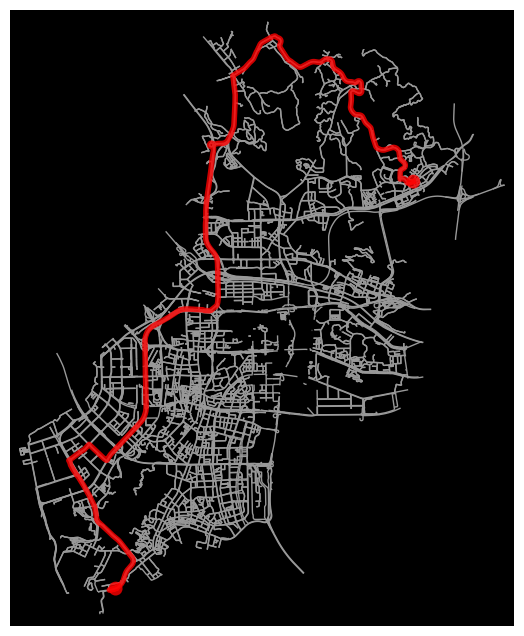

In [40]:
# plot route
fig, ax = ox.plot_graph_route(G2, route,
                              route_color="r", route_alpha=0.8,
                              route_linewidth=4, node_size=0, bgcolor='k')

In [41]:
route_map = ox.plot_route_folium(G2, route, color="red", weight=5, opacity=0.5 ,alpha=0.5,tiles='openstreetmap', popup_attribute='name')

In [42]:
route_map

In [43]:
marker = folium.Marker(location=[22.5955404,113.9947326])
marker.add_to(route_map)
marker1 = folium.Marker(location=[22.4693985,113.8948536],icon=folium.Icon(color='red'))
marker1.add_to(route_map)

In [44]:
route_map